In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [30]:
data = pd.read_csv('ce475_project_data.csv', delimiter=';')
data.head()

,x1,x2,x3,x4,x5,x6,Y
0,1,37,12,65,-18,1,1.0
1,27,14,6,85,11,27,-24.0
2,34,13,14,63,-16,34,4092.0
3,5,18,24,83,-4,5,121.0
4,31,44,10,57,-7,31,2441.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      120 non-null    int64  
 1   x2      120 non-null    int64  
 2   x3      120 non-null    int64  
 3   x4      120 non-null    int64  
 4   x5      120 non-null    int64  
 5   x6      120 non-null    int64  
 6   Y       100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 6.7 KB


In [32]:
data.shape

(120, 7)

In [33]:
data.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
Y     20
dtype: int64

<AxesSubplot:>

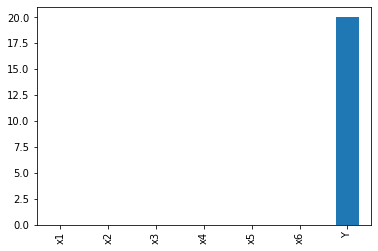

In [34]:
data.isna().sum().plot(kind='bar')

In [35]:
test_data = data[data['Y'].isnull()].copy()
test_data.head()

,x1,x2,x3,x4,x5,x6,Y
100,8,46,30,32,5,8,NaN
101,10,23,16,27,13,10,NaN
102,6,9,28,76,-20,6,NaN
103,11,31,3,46,-11,11,NaN
104,12,27,0,98,20,12,NaN


In [36]:
test_data.shape

(20, 7)

In [37]:
train_data = data[data['Y'].notnull()]
train_data.head()

,x1,x2,x3,x4,x5,x6,Y
0,1,37,12,65,-18,1,1.0
1,27,14,6,85,11,27,-24.0
2,34,13,14,63,-16,34,4092.0
3,5,18,24,83,-4,5,121.0
4,31,44,10,57,-7,31,2441.0


In [38]:
train_data.shape

(100, 7)

In [39]:
x_train = train_data.drop(['Y'], axis=1)
y_train = train_data['Y']

In [40]:
x_train.head()

,x1,x2,x3,x4,x5,x6
0,1,37,12,65,-18,1
1,27,14,6,85,11,27
2,34,13,14,63,-16,34
3,5,18,24,83,-4,5
4,31,44,10,57,-7,31


In [41]:
y_train.head()

0       1.0
1     -24.0
2    4092.0
3     121.0
4    2441.0
Name: Y, dtype: float64

In [42]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
x_test = test_data.drop(['Y'], axis=1).copy()
y_test = test_data['Y'].copy()

In [44]:
x_test.head()

,x1,x2,x3,x4,x5,x6
100,8,46,30,32,5,8
101,10,23,16,27,13,10
102,6,9,28,76,-20,6
103,11,31,3,46,-11,11
104,12,27,0,98,20,12


In [45]:
y_test.head()

100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
Name: Y, dtype: float64

In [46]:
y_pred = lr.predict(x_test)
y_pred

array([ 1256.25147814, -1002.73960538,  3879.95466765,  1053.57564767,
       -2512.00704809,  1631.97626649,  -121.46981708,  2563.93587106,
        3880.6718983 , -2171.12570115, -1764.1740434 ,  -885.6415808 ,
        1627.90109817,  4053.29671496,  3177.74861368,  -711.7545255 ,
        2412.72924632,  3665.14430827,  2224.79531571,  1316.60232043])

In [47]:
test_data.loc[:, 'Y'] = y_pred
test_data

,x1,x2,x3,x4,x5,x6,Y
100,8,46,30,32,5,8,1256.251478
101,10,23,16,27,13,10,-1002.739605
102,6,9,28,76,-20,6,3879.954668
103,11,31,3,46,-11,11,1053.575648
104,12,27,0,98,20,12,-2512.007048
105,1,5,29,100,-3,1,1631.976266
106,2,1,1,53,-11,2,-121.469817
107,35,1,0,48,-11,35,2563.935871
108,38,47,29,36,4,38,3880.671898
109,16,25,3,31,18,16,-2171.125701


In [48]:
final_data = pd.concat([train_data, test_data])
final_data

,x1,x2,x3,x4,x5,x6,Y
0,1,37,12,65,-18,1,1.000000
1,27,14,6,85,11,27,-24.000000
2,34,13,14,63,-16,34,4092.000000
3,5,18,24,83,-4,5,121.000000
4,31,44,10,57,-7,31,2441.000000
...,...,...,...,...,...,...,...
115,5,27,20,23,10,5,-711.754525
116,17,34,29,81,3,17,2412.729246
117,25,0,13,64,-17,25,3665.144308
118,25,23,12,96,-2,25,2224.795316
